In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
#import EMSC

import Tissue_Analysis_Tools as TAT

In [39]:
file_place = r"B:\Breast Cancer Data"

DATA = pd.read_pickle(os.path.join(file_place,"Breast_Data"))

metadata = pd.read_csv(os.path.join(file_place,"Breast_Metadata.csv"))

DATA = DATA.reset_index().merge(metadata, how = "inner", left_on =  "Core", right_on = "position")

DATA = DATA.drop(['catalognum',
 'position',
 'sex',
 'age',
 'pathology',
 'grade',
 'stage',
 'type'], axis = 1)

DATA["T"] = DATA.apply(lambda row: re.search("T(.+?)N", row["tnm"])[1] if row["tnm"] != "-" else  "-", axis = 1)
DATA["N"] = DATA.apply(lambda row: re.search("N(.+?)M", row["tnm"])[1] if row["tnm"] != "-" else  "-", axis = 1)
DATA["TMA"] = "BR20832"
DATA.set_index([col for col in DATA.columns if type(col) != int], inplace = True)

DATA = DATA.loc[(DATA.reset_index()["Pathology"] == "Invasive ductal carcinoma").values]

In [35]:
metadata

,catalognum,position,sex,age,organ,pathology,grade,stage,tnm,type
0,BR20832,A1,F,65,Breast,Invasive ductal carcinoma,1,IIa,T2N0M0,Malignant
1,BR20832,A2,F,47,Breast,Invasive ductal carcinoma,1,IIa,T2N0M0,Malignant
2,BR20832,A3,F,46,Breast,Invasive ductal carcinoma,1,IIa,T2N0M0,Malignant
3,BR20832,A4,F,43,Breast,Invasive ductal carcinoma,1,I,T1N0M0,Malignant
4,BR20832,A5,F,48,Breast,Invasive ductal carcinoma,1,IIa,T2N0M0,Malignant
5,BR20832,A6,F,53,Breast,Invasive ductal carcinoma,1,IIa,T2N0M0,Malignant
6,BR20832,A7,F,64,Breast,Invasive ductal carcinoma,1,IIa,T2N0M0,Malignant
7,BR20832,A8,F,34,Breast,Invasive ductal carcinoma,1,I,T1N0M0,Malignant
8,BR20832,A9,F,45,Breast,Invasive ductal carcinoma,1,IIa,T2N0M0,Malignant
9,BR20832,A10,F,40,Breast,Invasive ductal carcinoma,2,I,T1N0M0,Malignant


In [23]:
DATA.head()

912   \
Sex Type      Stage Pathology                 Grade Label Age Core organ  tnm    T   N TMA                 
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4   Breast T2N0M0 T2N 0 BR20832  0.094676   
                                                                                       BR20832  0.094676   
                                                                                       BR20832  0.095110   
                                                                                       BR20832  0.095979   
                                                                                       BR20832  0.097282   

                                                                                                    916   \
Sex Type      Stage Pathology                 Grade Label Age Core organ  tnm    T   N TMA                 
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4   Breast T2N0M0 T2N 0 BR20832  0.093373   
                                                                                       BR20832  0.093808   
                                                                                       BR20832  0.093808   
                                                                                       BR20832  0.095110   
                                                                                       BR20832  0.095979   

                                                                                                    920   \
Sex Type      Stage Pathology                 Grade Label Age Core organ  tnm    T   N TMA                 
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4   Breast T2N0M0 T2N 0 BR20832  0.095110   
                                                                                       BR20832  0.095110   
                                                                                       BR20832  0.095545   
                                                                                       BR20832  0.096848   
                                                                                       BR20832  0.097716   

                                                                                                    924   \
Sex Type      Stage Pathology                 Grade Label Age Core organ  tnm    T   N TMA                 
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4   Breast T2N0M0 T2N 0 BR20832  0.095545   
                                                                                       BR20832  0.095545   
                                                                                       BR20832  0.095979   
                                                                                       BR20832  0.097282   
                                                                                       BR20832  0.099019   

                                                                                                    928   \
Sex Type      Stage Pathology                 Grade Label Age Core organ  tnm    T   N TMA                 
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4   Breast T2N0M0 T2N 0 BR20832  0.096848   
                                                                                       BR20832  0.096848   
                                                                                       BR20832  0.097282   
                                                                                       BR20832  0.098151   
                                                                                       BR20832  0.099888   

                                                                                                    932   \
Sex Type      Stage Pathology                 Grade Label Age Core organ  tnm    T   N TMA                 
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4   Breast T2N0M0 T2N 0 BR20832  0.0

In [200]:
%%time

rbc = TAT.Rubber_Band_Correction()

corrected = rbc.fit_transform(corrected.columns, corrected.iloc[0,:].values)

CPU times: user 785 µs, sys: 325 µs, total: 1.11 ms
Wall time: 845 µs


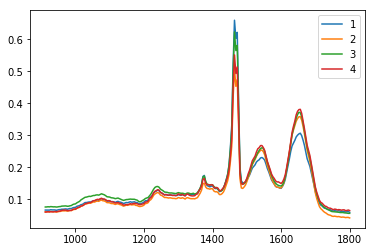

In [41]:
for name, df in DATA.groupby(level = "T"):
    
    plt.plot(df.mean(axis = 0, numeric_only = True), label = name)
    
plt.legend()

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [42]:
lda_ = LinearDiscriminantAnalysis(n_components = 2).fit_transform(DATA, DATA.reset_index()["T"])

lda_ = pd.DataFrame(lda_, index = DATA.index, columns = ["PCA: {}".format(n) for n in range(1,3)])

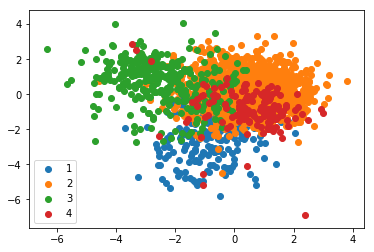

In [43]:
for name, df in lda_.groupby("T"):
    
    samp = df.sample(frac = 0.01)
    
    plt.scatter(samp["PCA: 1"], samp["PCA: 2"], label = name)
    
plt.legend()

In [50]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

lb = LabelBinarizer()

DATA = DATA.sample(frac = 1) # Shuffle the dataframe randomly

y_label = "T"

X = DATA
Y = DATA.reset_index()[y_label]

lb.fit(Y)

Y_b = pd.DataFrame(lb.transform(Y), index = Y.index)

while True:
    # split set by patients
    train_p, valid_p = train_test_split(np.unique(DATA.reset_index()["Core"])
                                        , test_size = 0.1
                                        #, random_state = 42
                                        , shuffle = True)

    # Training and validation sets on patient basis
    X_train = X[X.reset_index()["Core"].isin(train_p).values]
    X_valid = X[X.reset_index()["Core"].isin(valid_p).values]

    y_train = X_train.reset_index()[y_label]
    y_valid = X_valid.reset_index()[y_label]
    
    if len(np.unique(X_train.reset_index()[y_label])) == len(np.unique(X_valid.reset_index()[y_label])): break
    
#pd.DataFrame(X_valid.values, index = y_valid.values).round(6).to_csv(r"E:\Validation.csv".format(i+1), header = None)

print("Train set: \n", y_train.value_counts(), "\n")
print("Validation set: \n", y_valid.value_counts(), "\n")

# Create dataframes containing the binary labels for each class
y_train = pd.DataFrame(lb.transform(y_train), index = y_train.index)
y_valid = pd.DataFrame(lb.transform(y_valid), index = y_valid.index)


if len(np.unique(Y)) == 2: y_train[1] = y_train[0].map({0:1, 1:0})
if len(np.unique(Y)) == 2: y_valid[1] = y_valid[0].map({0:1, 1:0})

Train set: 
 2    159247
3     31614
1     21512
4      5000
Name: T, dtype: int64 

Validation set: 
 2    17787
4     9402
1     1823
3      516
Name: T, dtype: int64 



In [55]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA

import Tissue_Analysis_Tools as TAT

steps = [
         ("RobustScaler", RobustScaler()),
         ("PCA_Denoise", TAT.PCA_denoiser(20)),
         ("Rubber band", TAT.Rubber_Band_Correction())
        ]

pipe  = Pipeline(steps)

In [56]:
datasets = dict()

for subset_name, data_subset in zip(["Train", "Validation"], [X_train, X_valid]):

    dataframe = TAT.process_data(data_subset, paraffin = (1340,1490))#, balance = "Type")
    values = pipe.fit_transform(dataframe.T).T
    datasets[subset_name] = pd.DataFrame(values, index = dataframe.index, columns = dataframe.columns)

Processing


B:\Programs\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


TypeError: fit() missing 1 required positional argument: 'y'

B:\Programs\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


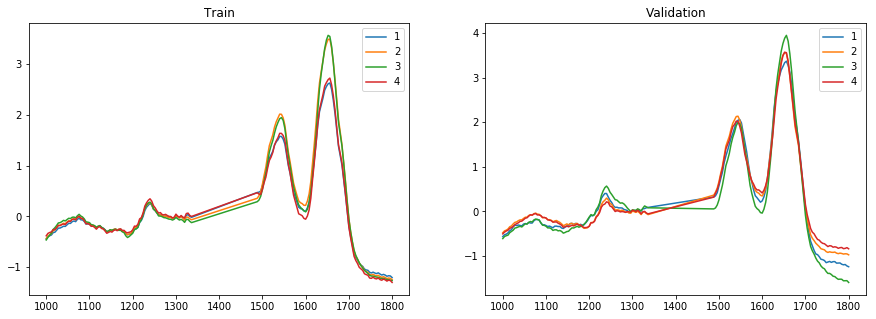

In [53]:
fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (15,5))

for ax, title in zip(axes.flat, datasets.keys()):
    for name, df in datasets[title].groupby("T"):

        ax.plot(df.mean(axis = 0, numeric_only = True), label = name)
        ax.legend()
        ax.set_title(title)
        
plt.show()    

# HyperOpt Training - XGBoost

In [86]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

This will ouput a score for the current hyperparameter configuration 

In [87]:
from sklearn.metrics import f1_score, confusion_matrix

def j_xg_bin(y_predicted, dtrain_true, thresh = 0.6):
    
    y_true = dtrain_true.get_label().astype(int)
    
    bin_preds = [1 if pred > thresh else 0 for pred in y_predicted]

    tn, fp, fn, tp = confusion_matrix(y_true, bin_preds).ravel()
    
    sens = tp/(tp+fn)
    spec = tn/(tn+fp)
    j = sens + spec - 1
        
    return "J", 1-j # Return inverse as this score will be minimised


def f1_xg_bin(y_predicted, dtrain_true, thresh = 0.5):
    
    y_true = dtrain_true.get_label().astype(int)
    
    bin_preds = [1 if pred > thresh else 0 for pred in y_predicted]
        
    return "F1", 1-f1_score(y_true, bin_preds) # Return inverse as this score will be minimised


def j_normal_bin(y_true, y_pred, thresh = 0.6):
    
    bin_preds = [1 if pred > thresh else 0 for pred in y_pred]
    
    tn, fp, fn, tp = confusion_matrix(y_true, bin_preds).ravel()
    
    sens = tp/(tp+fn)
    spec = tn/(tn+fp)
    j = sens + spec - 1
    
    return j

In [100]:
import xgboost as xgb

def hyper_opt_search_XGBoost(X, y, grouping, weight_binary = False
                             , optimiser = tpe.suggest, random_state = 42
                             , cores = 1, n_evals = 3, k_splits = 2):
    
    from sklearn.model_selection import train_test_split, GroupKFold, LeaveOneGroupOut, StratifiedKFold
    from sklearn.metrics import roc_auc_score
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    def score(params):
        
        loss_cv = []
        scores = []
        
        i = 0

        for train_index, test_index in GroupKFold(k_splits).split(X, y, grouping):
            
            dtrain = xgb.DMatrix(X[train_index], label=y[train_index])
            dtest = xgb.DMatrix(X[test_index], label=y[test_index])

            watchlist = [(dtest, 'eval'), (dtrain, 'train')]

            xgb_cl = xgb.train(params, dtrain, evals=watchlist, verbose_eval=False)

            predictions = xgb_cl.predict(dtest, ntree_limit = xgb_cl.best_iteration + 1)

            # TODO: try and get the y_labels from dtest
            score = roc_auc_score(y[test_index], predictions)
            scores.append(score)
            
            loss = 1 - score
            
            loss_cv.append(loss)
            
        #print("\tScore {0}\n\n".format(1-loss))
        return {'loss': loss.mean(), 'status': STATUS_OK, 'scores': scores}
    
    space = {
        "colsample_bylevel" : hp.quniform('colsample_bylevel', 0.1,1,0.05),
        "n_classes" : 2,
        "scale_pos_weight" : 1/(np.sum(y)/y.shape[0]),
        'n_estimators': hp.quniform('n_estimators', 10, 1000, 1),
        'learning_rate': hp.quniform('learning_rate', 0.025, 0.7, 0.025),
        # A problem with max_depth casted to float instead of int with
        # the hp.quniform method.
        'max_depth':  hp.choice('max_depth', np.arange(3, 15, dtype=int)),
        'min_child_weight': hp.quniform('min_child_weight', 1, 8, 1),
        'subsample': hp.quniform('subsample', 0.3, 1, 0.05),
        'gamma': hp.quniform('gamma', 0.3, 1, 0.05),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 0.95, 0.05),
        'eval_metric': 'auc',
        #'eval_metric': j_normal_bin,
        'objective': 'binary:logistic',
        # Increase this number if you have more cores. Otherwise, remove it and it will default 
        # to the maxium number. 
        'nthread': cores,
        'booster': 'gbtree',
        'tree_method': 'exact',
        'silent': 1,
        'seed': random_state      
    }

    # Use the fmin function from Hyperopt to find the best hyperparameters
    best = fmin(score, space, algo=tpe.suggest, 
                # trials=trials, 
                max_evals=n_evals)
    
    best["scale_pos_weight"] = space["scale_pos_weight"]
    best["n_estimators"] = int(best["n_estimators"])

    return best

In [103]:
%time
from sklearn.model_selection import train_test_split, GroupKFold, LeaveOneGroupOut

xgbinary_classifiers = dict()
classifier_results = dict()

for i, name in enumerate(np.unique(Y)):
    
    if name != "3": continue
    
    
    print("\n{}: {}".format(i + 1, name))
    
    # Implement maximum number of splits up to 5.
    index = datasets["Train"].reset_index()[y_label] == datasets["Train"].reset_index()[y_label].value_counts()[name]
    index = datasets["Train"].reset_index()[y_label] == name
    k_splits = len(X_train[index.values].reset_index()["Core"].value_counts())-1
    
    # Set to 5 if too many
    if k_splits > 3: k_splits = 3
        
    print("N splits: {}".format(k_splits))

    best_hyperparams = hyper_opt_search_XGBoost(datasets["Train"].values,
                                        y_train[i].values,
                                        datasets["Train"].reset_index()["Core"],
                                        weight_binary = True,
                                        optimiser = tpe.suggest,
                                        random_state = 42,
                                        cores = 4,
                                        n_evals = 10,
                                        k_splits = k_splits)
                                #, trials = Trials())
    
    ## TODO: append best classifier to dictionary, store any other
    ## relevant variables with it using trials.
    clf_xgb = xgb.XGBClassifier(n_jobs = -1)
    
    # Set the parameters which are best for that particular class
    clf_xgb.set_params(**best_hyperparams)
    clf_xgb.fit(X_train.values, y_train[i])

    xgbinary_classifiers[name] = clf_xgb
    
classifier_results["XGB"] = xgbinary_classifiers

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs

4: 3
N splits: 3
100%|██████████| 10/10 [06:01<00:00, 29.65s/it, best loss: 0.561440193494535]


# Results

In [ ]:
probs = TAT.bin_predict(X_valid.values, xgbinary_classifiers)

aucs = pd.Series({class_name: roc_auc_score(y_valid.iloc[:,i], probs.iloc[:,i]) for i, class_name in enumerate(probs.columns)}, name = "AUC")

results_xgb = pd.DataFrame(TAT.sens_spec_etc(lb.inverse_transform(y_valid.values), probs.idxmax(axis = 1))).append(aucs)#, ignore_index = True)

In [ ]:
results_xgb

# VecStack

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss
# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# Stacking
from vecstack import stacking

In [112]:
models_1 = [ 
    GaussianNB(),
    
    LogisticRegression(random_state=0, class_weight = "balanced", n_jobs = 1, solver = "liblinear"),
    
    ExtraTreesClassifier(random_state=0, n_jobs=-1, 
                         n_estimators=100, max_depth=3),
                         
    RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100, max_depth=3),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3),
                  
    LGBMClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                   n_estimators=100, max_depth=3),
]

In [113]:
%time
from sklearn.model_selection import train_test_split, GroupKFold, LeaveOneGroupOut

xgbinary_classifiers = dict()
classifier_results = dict()

for i, name in enumerate(np.unique(Y)):
    
    if name != "3": continue
    
    print("\n{}: {}".format(i + 1, name))
    
    # Implement maximum number of splits up to 5.
    index = datasets["Train"].reset_index()[y_label] == datasets["Train"].reset_index()[y_label].value_counts()[name]
    index = datasets["Train"].reset_index()[y_label] == name
    k_splits = len(X_train[index.values].reset_index()["Core"].value_counts())-1
    
    # Set to 5 if too many
    if k_splits > 3: k_splits = 3
        
    print("N splits: {}".format(k_splits))
 
    S_train_1, S_test_1 = stacking(models_1,                   # list of models
                                   datasets["Train"],
                                   y_train[i].values,
                                   datasets["Validation"],   # data
                                   regression=False,           # classification task (if you need 
                                                               #     regression - set to True)
                                   mode='oof_pred',            # mode: oof for train set, fit on full 
                                                               #     train and predict test set once
                                   needs_proba=True,           # predict probabilities (if you need 
                                                               #     class labels - set to False) 
                                   save_dir='.',               # save result and log in current dir 
                                                               #     (to disable saving - set to None)
                                   metric=log_loss,            # metric: callable
                                   n_folds=5,                  # number of folds
                                   stratified=True,            # stratified split for folds
                                   shuffle=True,               # shuffle the data
                                   random_state=0,             # ensure reproducibility
                                   verbose=1)                  # print all info

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.29 µs

4: 3
N splits: 3
task:         [classification]
n_classes:    [2]
metric:       [log_loss]
mode:         [oof_pred]
n_models:     [6]

model  0:     [GaussianNB]
    ----
    MEAN:     [4.20964856] + [0.04975923]
    FULL:     [4.20964893]

    Fitting on full train set...

model  1:     [LogisticRegression]
    ----
    MEAN:     [0.53758358] + [0.00147561]
    FULL:     [0.53758359]

    Fitting on full train set...

model  2:     [ExtraTreesClassifier]
    ----
    MEAN:     [0.30652805] + [0.00007474]
    FULL:     [0.30652805]

    Fitting on full train set...

model  3:     [RandomForestClassifier]
    ----
    MEAN:     [0.28924213] + [0.00017556]
    FULL:     [0.28924213]

    Fitting on full train set...

model  4:     [XGBClassifier]
    ----
    MEAN:     [0.21715044] + [0.00076188]
    FULL:     [0.21715044]

    Fitting on full train set...

model  5:     [LGBMClassifier]
    ----
    MEAN:     [0.21268755] 